# Estimating CrY2H-seq screen saturation

we simulated results for all possible orderings (C10 i) for the ten replicate screens. We calculated the average number and s.d. of interactions detected at each step, considering all possible orderings

```bash
# /public1/home/pg3152/moweipeng/lp-data/2nd-seq/sum
./check_saturation.py $(ls LP*)
```

In [ ]:
pip install lmfit

In [2]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt

**For PacBio data**

In [3]:
s = [i for i in range(1,13)]
s = np.array(s)
v = [1357.6666666666667, 2577.8333333333335, 3682.090909090909, 4687.131313131313,
     5606.299242424242, 6450.440476190476, 7228.400252525253, 7947.359595959596,
     8613.095454545455, 9230.19696969697, 9802.25, 10332.0] 
v = np.array(v)
y_err = [1137.5618908681652, 1452.7324680536926, 1594.799223872024, 1635.0578060794999,
         1603.2901241892118, 1515.5492945482947, 1381.6699026353656, 1208.1744238178167,
         999.4299306819739, 757.4059241451779, 477.19809391209157, 0]
y_err = np.array(y_err)

Text(0,0.5,'No. of protein interactions')

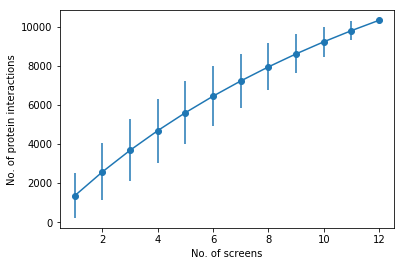

In [4]:
plt.errorbar(s, v, yerr=y_err, fmt='o-')
plt.xlabel('No. of screens')
plt.ylabel('No. of protein interactions')

In [5]:
def residual(p, x, data):
    vmax = p['vmax'].value
    km = p['km'].value
    model = vmax * x / (km + x)
    return (data - model)

p = Parameters()
p.add('vmax', value=1., min=0.)
p.add('km', value=1., min=0.)

out = minimize(residual, p, args=(s, v))

In [6]:
out

Text(0,0.5,'No. of protein interactions')

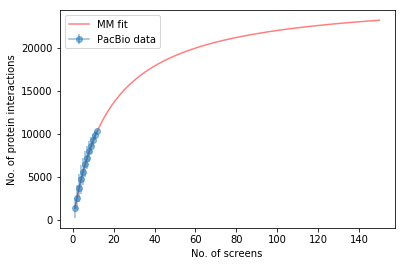

In [7]:
vmax = 25994.1354
km = 18.1733166
x, y = [], []
for i in range(1, 151):
  x.append(i)
  y.append(vmax * i / (km + i))

plt.errorbar(s, v, yerr=y_err, fmt='o-', alpha=.5, label='PacBio data')
plt.plot(x, y, color='r',alpha=.5, label='MM fit')
plt.legend()
plt.xlabel('No. of screens')
plt.ylabel('No. of protein interactions')

**For Illumina data**

In [ ]:
s = [i for i in range(1,6)]
s = np.array(s)
v = [1318.0, 2530.8, 3683.8, 4794.2, 5871.0]
v = np.array(v)
y_err = [1015.517995901599, 1244.5561297105085, 1249.4376975263713, 1024.4003904723972, 0]
y_err = np.array(y_err)

In [ ]:
def residual(p, x, data):
    vmax = p['vmax'].value
    km = p['km'].value
    model = vmax * x / (km + x)
    return (data - model)

p = Parameters()
p.add('vmax', value=1., min=0.)
p.add('km', value=1., min=0.)

out = minimize(residual, p, args=(s, v))

In [20]:
out

Text(0, 0.5, 'No. of protein interactions')

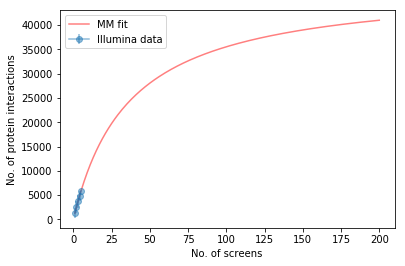

In [26]:
vmax = 48462.9986
km = 36.3448143
x, y = [], []
for i in range(1, 201):
  x.append(i)
  y.append(vmax * i / (km + i))

plt.plot(x, y, color='r',alpha=.5,label='MM fit')
plt.errorbar(s, v, yerr=y_err, fmt='o-', alpha=.5, label='Illumina data')
plt.legend()
plt.xlabel('No. of screens')
plt.ylabel('No. of protein interactions')